# Digit Recognition using Keras Sequential Model (CNN)

### By Nitish R. Devadiga
##### Last Modified: 05/07/2020

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import math

%matplotlib inline
#style.use('seaborn')

In [2]:
tf.__version__

'2.2.0'

## Load MNIST DATASET

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1).astype('float32')
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1).astype('float32')
#y_train = tf.keras.utils.to_categorical(y_train)
#y_test = tf.keras.utils.to_categorical(y_test)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### Normalize the dataset

In [4]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

### Visualize a random data

Training Size:  60000
Testing Size:  10000


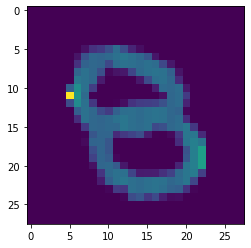

In [5]:
import random
print("Training Size: ", len(x_train))
print("Testing Size: ", len(x_test))
#print(x_train[0].shape)
plt.imshow(x_train[random.randint(0,60000)].reshape(28,28))

### Preprocess the image by making the pixels have hard edges

In [6]:
for x in x_train:
    x[x>0.1] = 1
    x[x<0.05] = 0
    
for x in x_test:
    x[x>0.1] = 1
    x[x<0.05] = 0

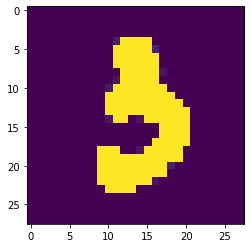

In [7]:
plt.imshow(x_test[random.randint(0,10000)].reshape(28,28))

## Train using a Keras Sequential CNN model

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (5,5), activation='relu', input_shape=(28, 28,1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (5,5), activation='relu'),
    #tf.keras.layers.Conv2D(32, (5,5), activation='relu'),
    #tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
    #tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
    #tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1028, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 32)          12832     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          51264     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1028)              1053700   
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, NumpyArrayIterator

train_datagen = ImageDataGenerator(zoom_range=0.1)
test_datagen  = ImageDataGenerator()

batchSize = 200

train_generator = NumpyArrayIterator(x_train, y_train, train_datagen, batch_size=batchSize, shuffle=True)

validation_generator =  NumpyArrayIterator(x_test,y_test, test_datagen, batch_size=batchSize)

model.compile(
    loss='sparse_categorical_crossentropy',
    #optimizer=tf.keras.optimizers.Adam(0.001),
    optimizer='adam',
    metrics=['accuracy'],
)

model.fit(train_generator, validation_data=(x_test,y_test), steps_per_epoch=len(x_train)/batchSize,verbose=1, epochs=9)

Epoch 1/9
300/300 [==============================] - 13s 43ms/step - loss: 0.2500 - accuracy: 0.9205 - val_loss: 0.0890 - val_accuracy: 0.9714
Epoch 2/9
300/300 [==============================] - 13s 44ms/step - loss: 0.0716 - accuracy: 0.9775 - val_loss: 0.0509 - val_accuracy: 0.9826
Epoch 3/9
300/300 [==============================] - 14s 45ms/step - loss: 0.0501 - accuracy: 0.9849 - val_loss: 0.0438 - val_accuracy: 0.9863
Epoch 4/9
300/300 [==============================] - 14s 46ms/step - loss: 0.0374 - accuracy: 0.9879 - val_loss: 0.0384 - val_accuracy: 0.9885
Epoch 5/9
300/300 [==============================] - 14s 46ms/step - loss: 0.0323 - accuracy: 0.9896 - val_loss: 0.0496 - val_accuracy: 0.9846
Epoch 6/9
300/300 [==============================] - 14s 46ms/step - loss: 0.0273 - accuracy: 0.9914 - val_loss: 0.0341 - val_accuracy: 0.9887
Epoch 7/9
300/300 [==============================] - 14s 46ms/step - loss: 0.0240 - accuracy: 0.9926 - val_loss: 0.0298 - val_accuracy: 0.9915

### Evaluate Model on Test Set

In [11]:
val_loss, val_acc = model.evaluate(validation_generator)
print(val_loss, val_acc)

50/50 [==============================] - 0s 9ms/step - loss: 0.0384 - accuracy: 0.9897
0.03837145119905472 0.9897000193595886


In [12]:
predictions = model.predict(validation_generator)

### Visualize the predictions

Index:  5620
Prediction:  7
Actual:  7


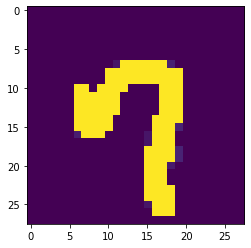

In [44]:
idx = random.randint(0,9500)
print("Index: ",idx)
print("Prediction: ", np.argmax(predictions[idx]))
print("Actual: ", y_test[idx])
plt.imshow(x_test[idx].reshape(28,28))

### Export model as .h5 and tfjs

In [14]:
import tensorflowjs as tfjs
model.save('ocr.h5')
tfjs.converters.save_keras_model(model, 'model')

c:\users\nitis\documents\study\projectcb\venv\lib\site-packages\tensorflowjs\converters\keras_h5_conversion.py:122: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


In [15]:
ocr_model = tf.keras.models.load_model('ocr.h5')

In [16]:
IMG_SIZE = 28
from skimage.transform import rescale, resize, downscale_local_mean

3

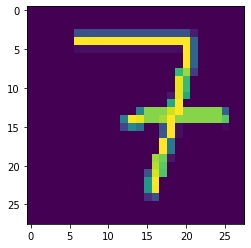

In [17]:
data = np.loadtxt('image.txt')
image_resized = data.reshape(28,28)
#image_resized = resize(image_resized, (IMG_SIZE, IMG_SIZE), anti_aliasing=False)
#image_resized = tf.keras.utils.normalize(image_resized, axis=1)
plt.imshow(image_resized)
image_resized = image_resized.reshape(1,IMG_SIZE,IMG_SIZE,1)
val = ocr_model.predict(image_resized)
np.argmax(val[0])